<h4>Data Mining Analysis for PE_ERPBI <small> - elaborated by DMiners - 4DS1</small></h4><br><br><br>
<u><strong><font size="3">PharmaSeek BI Solution: New Feature Suggestion & Design</font></strong></u><br>
<strong><font size="3">Products Sales Clusters Detection</font></strong><br><br>
An extra feature was thought of for our pharmaceutical business intelligence solution, is the detection of clusters within products based on the sales action inside the pharmacy. The reasons of this concept to be created are too many, one of them is the way it helps the managers organize their pharmacy space and partition it based on the product new created categories or the caracterization we may extract from this approach and by that we can exceed the traditional way of pharamcies space orgranization. Other reasons for this feature to be added to the solution is the monitoring of behaviour of the clusters within the sales department or even the inventory movements tracking and from that behaviour we can extract more business knowledge to optimize the whole process within the pharmacy.

In [49]:
import pandas as pd
fact_vente = pd.read_csv("fact_vente1.csv",sep=';')
dim_article = pd.read_csv("dim_article1.csv",sep=";",encoding="ISO-8859-1", dtype='unicode')
fact_vente.head()

,idArticle,idFacture,idVendeur,idTime,qte,totHT,totRemise
0,10023,NaN,15,164105,1,"3,620",",000"
1,10023,NaN,21,163290,1,"3,620",",000"
2,10023,NaN,23,162205,1,"3,620",",000"
3,10023,NaN,32,164078,1,"3,620",",000"
4,1003,NaN,21,162076,1,"5,185",",000"


In [50]:
dim_article.head()

,idArticle,categorie,designation,stockAlerte,DCI1,DCI2,DCI3,prixVenteHT,prixVenteTTC,prixAchatHT,prixAchatTTC
0,1,NaN,PRADIS FORT 0.4'FL/30ML,5,METOCLOPRAMIDE,NaN,NaN,"1,740","1,820","1,253","1,253"
1,10,PARAPHARMACIE,LE NATUREL STOP + GEL,0,NaN,NaN,NaN,"5,618","6,629","3,745","4,419"
2,100,MEDICAMENT,QUIETUDE SP ENF 200ML,1,NaN,NaN,NaN,"9,784","9,784","7,242","7,242"
3,1000,PARAPHARMACIE,ECRINAL DURCISSEUR LIQU.,1,NaN,NaN,NaN,"8,186","9,659","5,457","6,439"
4,10000,PREPARATION,PM63789 PREPARATION MAGISTRALE,0,NaN,NaN,NaN,"28,039","28,039","14,583","14,583"


In [51]:
kol = []
dim_article.idArticle = dim_article.idArticle.apply(lambda x : int(x))
kol.append(pd.merge(fact_vente, dim_article, how='inner', on='idArticle'))
kol[0]['nb']=1
ca = kol[0][["idArticle","nb"]].groupby("idArticle", as_index=True).sum().sort_values("nb",ascending=False)
kol[0]["nb"]=1
kol1=[]
kol1.append(pd.merge(ca,dim_article, how='inner', on='idArticle'))
kol1[0].DCI1.fillna("Pas définie", inplace=True)
kol1[0].DCI2.fillna("Pas définie", inplace=True)
kol1[0].DCI3.fillna("Pas définie", inplace=True)
kol1[0].head(5)

,idArticle,nb,categorie,designation,stockAlerte,DCI1,DCI2,DCI3,prixVenteHT,prixVenteTTC,prixAchatHT,prixAchatTTC
0,8010,1716,MEDICAMENT,DOLIPRANE 1000MG B/8CP,1,PARACETAMOL,Pas définie,Pas définie,"2,315","2,315","1,713","1,713"
1,2162,1262,MEDICAMENT,PHYSIOL 5ML B/10,30,CHLORURE SODIUM,Pas définie,Pas définie,"1,995","1,995","1,436","1,436"
2,1733,1104,MEDICAMENT,PANADOL EXTRA BT/16,50,Pas définie,CAFEINE,Pas définie,"2,275","2,275","1,684","1,684"
3,253,998,MEDICAMENT,EFFERALGAN VIT C B20 CP,100,Pas définie,ACIDE ASCORBIQUE,Pas définie,"1,975","1,975","1,422","1,422"
4,254,908,MEDICAMENT,EFFERALGAN SIROP 90ML,40,PARACETAMOL,Pas définie,Pas définie,"1,400","1,400",",980",",980"


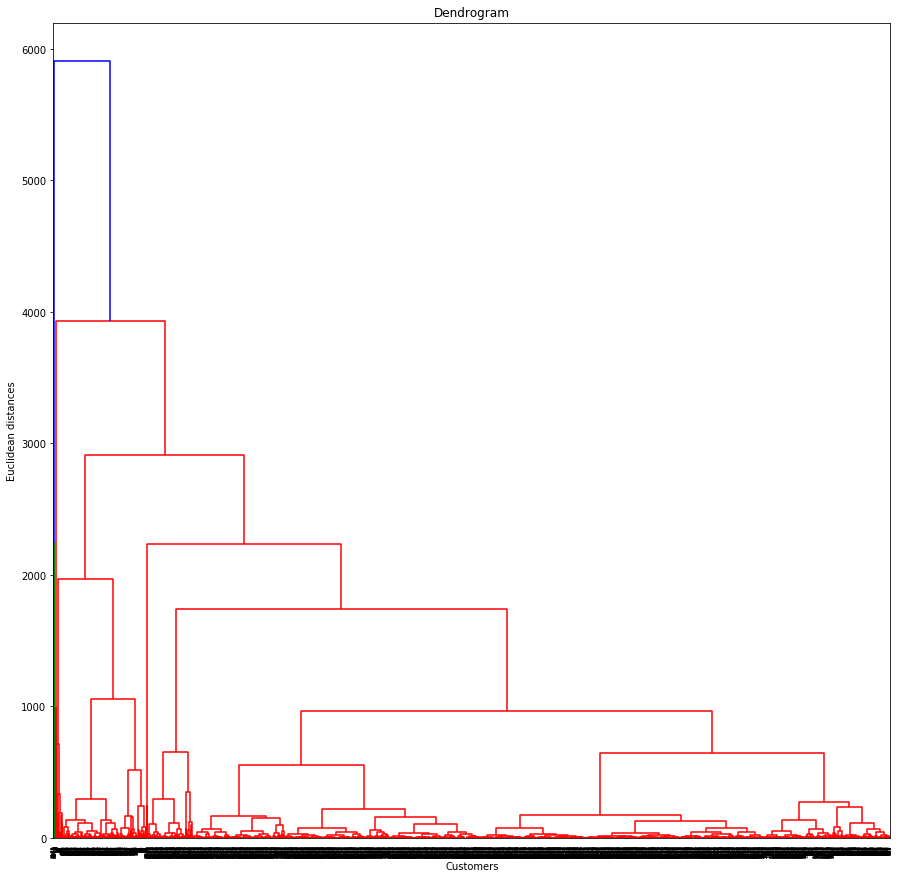

In [52]:
import numpy as np
import matplotlib.pyplot as plt
kol1[0].nb = kol1[0].nb.apply(lambda x : int(x))
kol1[0].stockAlerte = kol1[0].stockAlerte.fillna(0)
kol1[0].stockAlerte = kol1[0].stockAlerte.apply(lambda x : int(x))
kol1[0].prixVenteTTC = kol1[0].prixVenteTTC.apply(lambda x : float(x.replace(",", ".")))
X = kol1[0][["nb", "prixVenteTTC", "stockAlerte"]].values
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,15))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show();

So as we can see from this dendrogram showing the clustering process data passed by, we can see that, distancewise, the best number of clustering we can make is between 2 and 5. Following the gain by standard deviation, we can eliminate the last choice of 5 clusters as it didn't make us get much of stepwise separation. Finally, as we're seeking some group caracterization, we may pick 4 as the number of clusters we want to extract so that we have the maximum number of groups without loosing the purpose of the whole thing.

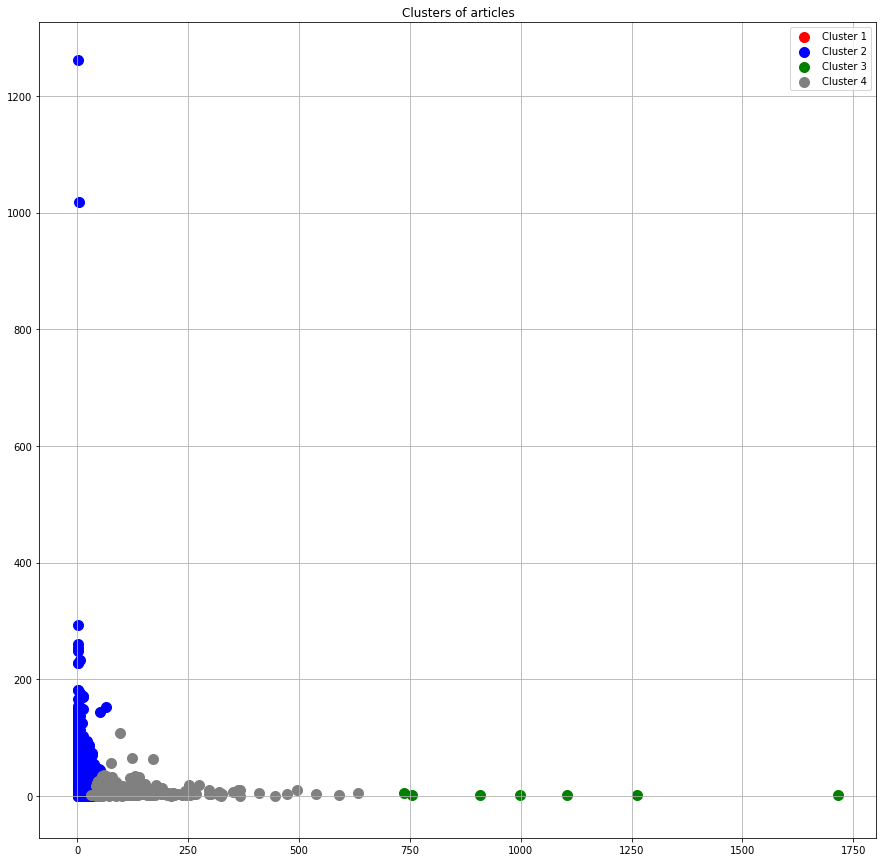

In [53]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
plt.figure(figsize=(15,15))
plt.grid(True)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'grey', label = 'Cluster 4')
plt.title('Clusters of articles')
plt.legend()
plt.show()

From this visualization, we can see that the clusters we got are well seperated visually so we may validate this step and procede to the group caracterization process.
One idea we can start to implement, is to try and check the categories distribution and categories intersection among the clusters extracted.

### <u>Categories distribution</u>

In [31]:
y=pd.DataFrame({"c":y_hc})
clustered = pd.concat([kol1[0], y],axis=1)
set(clustered[clustered.c==0].categorie.tolist())

{'ACCESSOIRE',
 'DENTAIRE',
 'DIETETIQUE',
 'HOMEOPATHIE',
 'LAIT',
 'MEDICAMENT',
 'PARAPHARMACIE',
 'PREPARATION',
 'PRODUITS CHIMIQUES',
 'TOILETTE',
 'VETERINAIRE',
 nan}

In [32]:
set(clustered[clustered.c==1].categorie.tolist())

{'MEDICAMENT'}

In [33]:
set(clustered[clustered.c==2].categorie.tolist())

{'ACCESSOIRE',
 'HOMEOPATHIE',
 'LAIT',
 'MEDICAMENT',
 'PARAPHARMACIE',
 'PREPARATION'}

In [34]:
set(clustered[clustered.c==3].categorie.tolist())

{'MEDICAMENT'}

### <u>Categories intersections</u>

In [35]:
set(clustered[clustered.c==0].categorie.tolist()) & set(clustered[clustered.c==2].categorie.tolist())

{'ACCESSOIRE',
 'HOMEOPATHIE',
 'LAIT',
 'MEDICAMENT',
 'PARAPHARMACIE',
 'PREPARATION'}

In [36]:
set(clustered[clustered.c==1].categorie.tolist()) & set(clustered[clustered.c==2].categorie.tolist())

{'MEDICAMENT'}

So, as we can see from the results, the first cluster contains the Nan category which is the category of the products for which we didn't specify the category attribute. That leads us to keep that cluster the last one to caracterize as we can predict that it's a cluster we can set its properties by elimination. So to start, we'll check the second and fourth clusters as they are the only clusters to contain only one category which is "<strong>Medicines</strong>".

In [37]:
clustered[clustered.c==1]

,idArticle,nb,categorie,designation,stockAlerte,DCI1,DCI2,DCI3,prixVenteHT,prixVenteTTC,prixAchatHT,prixAchatTTC,c
0,8010,1716,MEDICAMENT,DOLIPRANE 1000MG B/8CP,1,PARACETAMOL,Pas définie,Pas définie,"2,315",2.315,"1,713","1,713",1
1,2162,1262,MEDICAMENT,PHYSIOL 5ML B/10,30,CHLORURE SODIUM,Pas définie,Pas définie,"1,995",1.995,"1,436","1,436",1
2,1733,1104,MEDICAMENT,PANADOL EXTRA BT/16,50,Pas définie,CAFEINE,Pas définie,"2,275",2.275,"1,684","1,684",1
3,253,998,MEDICAMENT,EFFERALGAN VIT C B20 CP,100,Pas définie,ACIDE ASCORBIQUE,Pas définie,"1,975",1.975,"1,422","1,422",1
4,254,908,MEDICAMENT,EFFERALGAN SIROP 90ML,40,PARACETAMOL,Pas définie,Pas définie,"1,400",1.400,",980",",980",1
5,2704,756,MEDICAMENT,DOLIPRANE 500MG BT/16 CP,50,PARACETAMOL,Pas définie,Pas définie,"1,450",1.450,"1,015","1,015",1
6,503,737,MEDICAMENT,MAXILASE 3000 B24 CP,20,ALPHA AMYLASE,Pas définie,Pas définie,"5,425",5.425,"4,016","4,016",1
7,2849,634,MEDICAMENT,FERVEX ADULTE BT/8 SACHET,50,Pas définie,PARACETAMOL,ACIDE ASCORBIQUE,"4,135",4.135,"3,061","3,061",1
8,50,591,MEDICAMENT,ASPEGIC 100 MG B20 SA,30,Pas définie,Pas définie,Pas définie,"1,630",1.630,"1,174","1,174",1


In [38]:
clustered[clustered.c==3]

,idArticle,nb,categorie,designation,stockAlerte,DCI1,DCI2,DCI3,prixVenteHT,prixVenteTTC,prixAchatHT,prixAchatTTC,c
2901,2141,3,MEDICAMENT,DECAPEPTYL LP 11.25MG B/1,0,Pas définie,Pas définie,Pas définie,"1017,839",1017.919,"773,434","773,434",3
3764,18716,1,MEDICAMENT,ZOLADEX 10.8MG/INJ,1,GOSERELINE,Pas définie,Pas définie,"1262,137",1262.217,"959,071","959,071",3


After some knowledge seeking from multiple resources, the second cluster clearly contains the most selled products and in the same time, the medicines which can be obtained without some doctor's prescription. A result that we consider logical and also predictable as this cluster's products are the ones with the highest "stockAlerte" attribute which presents the <strong>tolerated inventory limit</strong> for these products.

As for the fourth cluster, it only obtains two products, and by looking at their attributes we can see that they may be the least selled ones and the most expensive ones at the same time, something logical too and would be too helpful in our inventory management and space organization.

In [39]:
clustered[clustered.c==2].head()

,idArticle,nb,categorie,designation,stockAlerte,DCI1,DCI2,DCI3,prixVenteHT,prixVenteTTC,prixAchatHT,prixAchatTTC,c
9,3560,538,MEDICAMENT,GRIPEX AD BT/12 SACHETS,5,PHENIRAMINE,PARACETAMOL,ACIDE ASCORBIQUE,"3,750",3.750,"2,776","2,776",2
10,2426,496,MEDICAMENT,CLAMOXYL 1GR B/12 CP,10,AMOXICILLINE,Pas définie,Pas définie,"10,305",10.385,"7,628","7,628",2
11,2982,472,MEDICAMENT,INFLAMYL 250MG BT20 CP,10,ACIDE MEFENAMIQUE,Pas définie,Pas définie,"2,425",2.505,"1,795","1,795",2
12,1380,447,PREPARATION,INJECTION IM SERINGUE 2CC,0,Pas définie,Pas définie,Pas définie,",500",0.500,",109",",109",2
13,2221,410,MEDICAMENT,MAXILASE FL/125 ML ADWY,20,ALPHA AMYLASE,Pas définie,Pas définie,"4,105",4.105,"3,037","3,037",2


Back to the third group, what we may notice while trying to caracterize it, is that this cluster tries to group the medicines which are related to the most frequent illnesses. (i.e light allergies & flu treatments, anti-anxiety products, acne treatments, etc)

This leads us then to the last group :

In [40]:
clustered[clustered.c==0]

,idArticle,nb,categorie,designation,stockAlerte,DCI1,DCI2,DCI3,prixVenteHT,prixVenteTTC,prixAchatHT,prixAchatTTC,c
195,9735,97,MEDICAMENT,SYNFLORIX SUSP INJ B/1DOSE,2,Pas définie,Pas définie,Pas définie,"107,316",107.396,"81,547","81,547",0
256,18170,76,MEDICAMENT,SERETIDE DISKUS 250/50,1,FLUTICASONE,SALMETEROL,Pas définie,"55,510",55.590,"42,181","42,181",0
270,2500,74,MEDICAMENT,LIPANTHYL 160MG BT/30CP,5,FENOFIBRATE,Pas définie,Pas définie,"18,145",18.225,"13,788","13,788",0
286,682,71,MEDICAMENT,FUCIDINE 250MG B/10 CP,5,FUSIDATE SODIUM,Pas définie,Pas définie,"18,500",18.580,"14,058","14,058",0
287,602,70,MEDICAMENT,OZOTHINE AD B10 SU,5,HUILE THEREBENTHINE,Pas définie,Pas définie,"5,565",5.565,"4,119","4,119",0
288,3117,70,MEDICAMENT,DEXAMEDIS 4MG /1AMP,10,DEXAMETHASONE,Pas définie,Pas définie,",682",0.762,",476",",476",0
289,7204,70,MEDICAMENT,NEBILET 5MG BT/30CP,1,NEBIVOLOL,Pas définie,Pas définie,"24,334",24.414,"18,491","18,491",0
290,793,70,MEDICAMENT,GASTRAL 20MG BT/14 GELL,2,OMEPRAZOLE,Pas définie,Pas définie,"21,920",22.000,"16,660","16,660",0
291,654,69,MEDICAMENT,POLYGYNAX B6 C.G,3,NEOMYCINE,POLYMYXINE,NYSTATINE,"4,735",4.815,"3,505","3,505",0
292,1622,69,MEDICAMENT,MOMENT 200MG/ML FL/12.5ML,2,IBUPROFENE,Pas définie,Pas définie,"3,705",3.785,"2,742","2,742",0


After a lot of trials, no special or efficient caracterization was successful neither were we able to detect what made this cluster distinguishable from the third one (as the graphs showed their near similarity). That being said, we'll consider this cluster as the eliminatory group for the other 3 groups, so for practical terminologies, we won't be treating or extracting special knowledge nor decisions about this cluster for the client using the application but we'll keep it simple and just predict this first group rating.